<a href="https://colab.research.google.com/github/jwdagney55/DSPS_JDagney/blob/main/HW4/HW4_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

(1) Newton's Second Law: $F = ma$

(2) Newton's Law of Gravity: $F_g = \frac{GMm}{r^2}$

where m is the mass of the orbiting body, and M is the mass of the galaxy

Substitute(2) in for (1) and we have: 

(3) $\frac{GMm}{r^2} = ma$

An orbiting body has centripetal acceleration (4) $a_c = \frac{v^2}{r}$

Substitute 4 in (3) in the right hand side

(5) $\frac{GMm}{r^2} = m\frac{v^2}{r}$

The mass of the orbiting body cancel as does one r and we are left with: 

(6) $\frac{GM}{r} = v^2$

QED



## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
# your code here
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv')

In [3]:
m31 = m31[['#M31', 'Grand', 'Rotation', 'Curve']].rename({'#M31':"r", 'Grand':'v', 'Rotation':'dv', 'Curve':'err'},axis=1)
m31 = m31[1:]

In [4]:
m31["r"] = [float(m31.iloc[i].r) for i in range(m31.shape[0])]
m31["v"] = [float(m31.iloc[i].v) for i in range(m31.shape[0])]
m31["dv"] = [float(m31.iloc[i].dv) for i in range(m31.shape[0])]
m31["err"] = [float(m31.iloc[i].err) for i in range(m31.shape[0])]
m31.head()

,r,v,dv,err
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200
5,0.207,210.188,3.943,3.258


In [5]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [6]:
apparentSizeM31 = 3.167 #deg
uncertApparentSize = 0.1 #idk
distanceM31 = 765 #kpc 
uncertDistance = 40


In [7]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.3f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.055 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [8]:
# your code here
print("Distance to Adromeda from Milky Way: {} +/- {} (Kpc)".format(distanceM31,uncertDistance))

Distance to Adromeda from Milky Way: 765 +/- 40 (Kpc)


In [9]:
# your code here
andromedaVisible = distanceM31 * np.tan(m31angS.to(u.rad))
print("Size of the visible component of Andromeda: {:2f} ".format(andromedaVisible) )

Size of the visible component of Andromeda: 42.328169 


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


In [10]:
m31Rds = andromedaVisible / 2
print(float(m31Rds))
m31Rds = float(m31Rds)

21.164084311233722


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [11]:
def getradii(gal, gsize, n):
  d = gal.iloc[0].r
  index = 1
  while(d <= n * gsize):
    #print(d, " is less than ", n * gsize)
    d = gal.iloc[index].r
    index+=1

  return d, np.sqrt(d), gal.iloc[index].v, gal.iloc[index].err, gal.iloc[index].dv


In [12]:
getradii(m31, m31Rds, 2)

(49.222, 7.01583922278725, 249.443, 26.447, 134.552)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

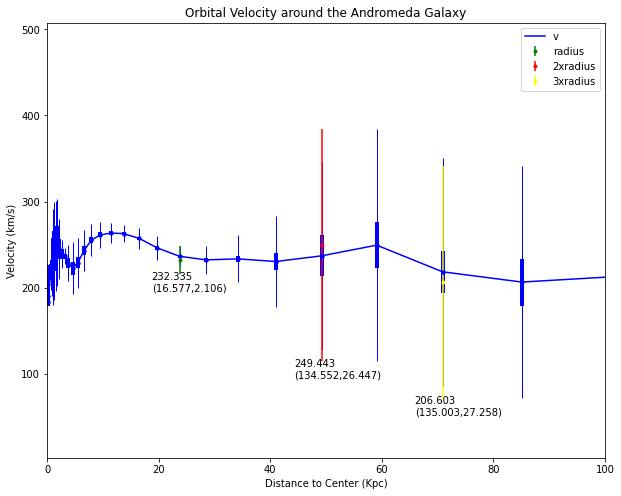

In [41]:
def plotGal(gal, rds):
  fig, ax = pl.subplots(figsize=(10,8))
  pl.xlim((0,100))
  pl.plot(gal.r, gal.v, color = 'blue' ,label='v')
  ax.errorbar(gal.r, gal.v, fmt='.', yerr=gal.err, color = 'blue',  elinewidth =4)
  ax.errorbar(gal.r, gal.v,fmt='.', yerr=gal.dv , color = 'blue', elinewidth=1)
  n1 = getradii(gal, rds, 1)
  n2 = getradii(gal, rds, 2)
  n3 = getradii(gal, rds, 3)

  ax.errorbar(n1[0], n1[2], yerr = n1[4], color = 'green', fmt='.', label = 'radius')
  ax.errorbar(n2[0], n2[2], yerr = n2[4], color = 'red', fmt='.', label = '2xradius')
  ax.errorbar(n3[0], n3[2], yerr = n3[4], color = 'yellow', fmt='.', label = '3xradius')
  pl.text(n1[0]-5, n1[2]-n1[4]-20, "{}\n({},{})".format(n1[2],n1[4], n1[3]))
  pl.text(n2[0]-5, n2[2]-n2[4]-20, "{}\n({},{})".format(n2[2],n2[4], n2[3]))
  pl.text(n3[0]-5, n3[2]-n3[4]-20, "{}\n({},{})".format(n3[2],n3[4], n3[3]))
  pl.xlabel("Distance to Center (Kpc)")
  pl.ylabel("Velocity (km/s)")
  pl.legend()

plotGal(m31, m31Rds)
pl.title("Orbital Velocity around the Andromeda Galaxy");

### Figure 1: Plot of the Orbital Velocity (km/s) vs Distance from center. At distances larger than one radius we expect to see a fall off of velocity proportional to 1/sqrt(r). However, we see that at a distance approximately 2 times larger than the radius, the velocity is roughly the same with the 'err' error bars extending to about 100 km/s and 300 km/s. 

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [55]:
def vratios(gal, rds, rd, err='dv'):
  dist = [0,0]
  distErr = [0, 0]
  vel = [0, 0]
  errors = [0, 0]
  dv = [0, 0]
  dist[0], distErr[0], vel[0], errors[0], dv[0] = getradii(gal, rds, 1)
  dist[1], distErr[1], vel[1], errors[1], dv[1] = getradii(gal, rds, rd/rds)
  expectedDrop = np.sqrt(rds)/np.sqrt(rd)
  print("Expected Drop: ", expectedDrop)
  ratioRad = dist[1]/dist[0]
  ratioVel = vel[1]/vel[0]
  print("Observed Ratios: \nRadius:\t\t",ratioRad, "\nVelocity:\t", ratioVel)
  velErr = 0
  if err == 'dv':
    velErr = abs(vel[1]/vel[0]) * np.sqrt( (dv[1]/vel[1])**2 + (dv[0]/vel[0])**2)
  else:
    velErr = abs(vel[1]/vel[0]) * np.sqrt( (errors[1]/vel[1])**2 + (errors[0]/vel[0])**2 )

  print("Error: ", velErr)
  print("Upper limit: ", ratioVel + 2 * velErr, "\nLower Limit: ", ratioVel - 2 * velErr)
  msg = "The expected drop is within the 2-sigma range" if expectedDrop >= ratioVel - 2 * velErr and expectedDrop <= ratioVel + 2 * velErr else "The expected drop is NOT within the 2-sigma range"
  print(msg)

  print("*************************")

  return

In [58]:
# your code here
print("Using dv")
vratios(m31, m31Rds, 2*m31Rds)
vratios(m31, m31Rds, 2.5*m31Rds)
vratios(m31, m31Rds, 3*m31Rds)
vratios(m31, m31Rds, 3.5*m31Rds)

Using dv
Expected Drop:  0.7071067811865476
Observed Ratios: 
Radius:		 2.0735529530710255 
Velocity:	 1.0736350528331935
Error:  0.5841736007045139
Upper limit:  2.241982254242221 
Lower Limit:  -0.09471214857583421
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.6324555320336759
Observed Ratios: 
Radius:		 2.488288819614121 
Velocity:	 0.9404050186153614
Error:  0.5736109437399932
Upper limit:  2.087626906095348 
Lower Limit:  -0.20681686886462503
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.5773502691896257
Observed Ratios: 
Radius:		 2.9859297329176844 
Velocity:	 0.889246131663331
Error:  0.5845240929904467
Upper limit:  2.0582943176442243 
Lower Limit:  -0.27980205431756244
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.5345224838248488
Observed Ratios: 
Radius:		 3.583115679501222 
Velocity:	 0.9167882583338713
Error:  0.5738481609310057
Upper limit: 

In [59]:
print("Using err")
vratios(m31, m31Rds, 2*m31Rds, err='err')
vratios(m31, m31Rds, 2.5*m31Rds, err='err')
vratios(m31, m31Rds, 3*m31Rds, err='err')
vratios(m31, m31Rds, 3.5*m31Rds, err='err')

Using err
Expected Drop:  0.7071067811865476
Observed Ratios: 
Radius:		 2.0735529530710255 
Velocity:	 1.0736350528331935
Error:  0.11424657877695615
Upper limit:  1.3021282103871057 
Lower Limit:  0.8451418952792812
The expected drop is NOT within the 2-sigma range
*************************
Expected Drop:  0.6324555320336759
Observed Ratios: 
Radius:		 2.488288819614121 
Velocity:	 0.9404050186153614
Error:  0.10646872162561287
Upper limit:  1.153342461866587 
Lower Limit:  0.7274675753641356
The expected drop is NOT within the 2-sigma range
*************************
Expected Drop:  0.5773502691896257
Observed Ratios: 
Radius:		 2.9859297329176844 
Velocity:	 0.889246131663331
Error:  0.11759854387755923
Upper limit:  1.1244432194184495 
Lower Limit:  0.6540490439082125
The expected drop is NOT within the 2-sigma range
*************************
Expected Drop:  0.5345224838248488
Observed Ratios: 
Radius:		 3.583115679501222 
Velocity:	 0.9167882583338713
Error:  0.12647470392419413
U

## Discussion
The results from Vera Rubin's 1970 paper suggest that the orbital speed outside of the luminous range of the Andromeda Galaxy does not follow the expected (can I say null hypothesis?) Newtonian framework. In such a frame work, a body orbiting a distance r > radius of the galaxy will have a velocity proportional to 1/sqrt(r). Using the 'dv' values for the error, however, the expected drop in velocity did fall into the 2-sigma range. We would have to have better measuring tools to decrease this value. The 'err' values do point to the ground breaking conclusion that something new is happening in the exterior of the galaxies? Is Newton wrong, or is there more matter that we can't see outside the luminous part of the Galaxy?

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [31]:
# your code here
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/mw.csv')

In [32]:
mw = mw[['#MW', 'Grand', 'Rotation', 'Curve']].rename({'#MW':"r", 'Grand':'v', 'Rotation':'dv', 'Curve':'err'},axis=1)
mw = mw[1:]

In [33]:
mw["r"] = [float(mw.iloc[i].r) for i in range(mw.shape[0])]
mw["v"] = [float(mw.iloc[i].v) for i in range(mw.shape[0])]
mw["dv"] = [float(mw.iloc[i].dv) for i in range(mw.shape[0])]
mw["err"] = [float(mw.iloc[i].err) for i in range(mw.shape[0])]
mw.head()

,r,v,dv,err
1,0.010,119.061,41.832,32.714
2,0.012,115.268,35.199,17.100
3,0.014,117.392,35.152,14.429
4,0.017,118.475,35.252,14.870
5,0.021,110.386,33.817,14.427


In [34]:
mw.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249062,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [35]:
mwRds = 56.70 / 2 #Kpc
mw.head()

,r,v,dv,err
1,0.010,119.061,41.832,32.714
2,0.012,115.268,35.199,17.100
3,0.014,117.392,35.152,14.429
4,0.017,118.475,35.252,14.870
5,0.021,110.386,33.817,14.427


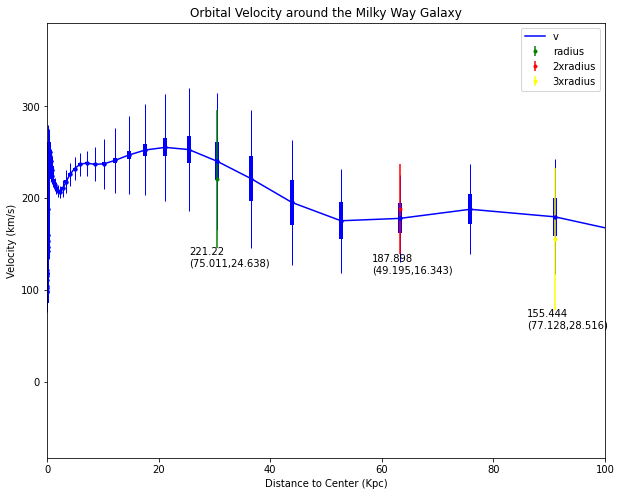

In [39]:
plotGal(mw, mwRds)
pl.title("Orbital Velocity around the Milky Way Galaxy");

### Figure 2: Plot of the Orbital Velocity (km/s) vs Distance from center for the Milky Way Galaxy. At distances larger than one radius we expect to see a fall off of velocity proportional to 1/sqrt(r) according to Newtonian mechanics. Qualitatively we do see a fall off of velocities larger than 1 radius until about 2 times the radius where the velocity levels off.

In [44]:
print("Using dv value for comparison")
vratios(mw, mwRds, 2*mwRds)
vratios(mw, mwRds, 2.5*mwRds)
vratios(mw, mwRds, 3*mwRds)
vratios(mw, mwRds, 3.5*mwRds)

Using dv value for comparison
Expected Drop:  0.7071067811865475
Observed Ratios: 
Radius:		 2.073629294221872 
Velocity:	 0.849371666214628
Error:  0.3638671356131401
Upper limit:  1.5771059374409082 
Lower Limit:  0.1216373949883478
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.6324555320336759
Observed Ratios: 
Radius:		 2.488335466089182 
Velocity:	 0.8122999728776783
Error:  0.39484932121324917
Upper limit:  1.6019986153041765 
Lower Limit:  0.022601330451179957
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.5773502691896257
Observed Ratios: 
Radius:		 2.986022246284083 
Velocity:	 0.7026670282976222
Error:  0.42228340879348447
Upper limit:  1.5472338458845911 
Lower Limit:  -0.14189978928934677
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.5345224838248487
Observed Ratios: 
Radius:		 3.5831938839124584 
Velocity:	 0.5820269415061929
Error:  0.44614554

In [45]:
print("Using err value for comparison")
vratios(mw, mwRds, 2*mwRds, err='err')
vratios(mw, mwRds, 2.5*mwRds, err='err')
vratios(mw, mwRds, 3*mwRds, err='err')
vratios(mw, mwRds, 3.5*mwRds,err='err')

Using err value for comparison
Expected Drop:  0.7071067811865475
Observed Ratios: 
Radius:		 2.073629294221872 
Velocity:	 0.849371666214628
Error:  0.1200267359858641
Upper limit:  1.0894251381863562 
Lower Limit:  0.6093181942428998
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.6324555320336759
Observed Ratios: 
Radius:		 2.488335466089182 
Velocity:	 0.8122999728776783
Error:  0.13082914322768038
Upper limit:  1.073958259333039 
Lower Limit:  0.5506416864223176
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.5773502691896257
Observed Ratios: 
Radius:		 2.986022246284083 
Velocity:	 0.7026670282976222
Error:  0.15079934573687845
Upper limit:  1.0042657197713791 
Lower Limit:  0.4010683368238653
The expected drop is within the 2-sigma range
*************************
Expected Drop:  0.5345224838248487
Observed Ratios: 
Radius:		 3.5831938839124584 
Velocity:	 0.5820269415061929
Error:  0.189673007368

## Discussion
The Milky Way analysis does not lead to similar conclusions as those of the analysis of the Andromeday Galaxy. At distances larger than 1 radius (~30Kpc) there is a fall off of orbital velocities, which agree with the expected fall of according to Newton's Laws. 

In [76]:
print("Means\tm31\t\tmw")
print('err\t{:.2f}\t\t{:.2f}'.format(m31.err.mean(), mw.err.mean()))
print('dv\t{:.2f}\t\t{:.2f}'.format(m31.dv.mean(), mw.dv.mean()))

Means	m31		mw
err	16.17		19.00
dv	55.03		48.25


(array([20.,  6.,  4.,  5.,  9.,  4.,  1.,  1.,  2.,  3.]),
 array([ 0.   ,  5.411, 10.822, 16.233, 21.644, 27.055, 32.466, 37.877,
        43.288, 48.699, 54.11 ]),
 <a list of 10 Patch objects>)

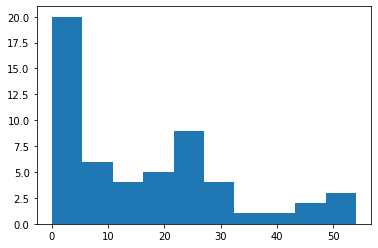

In [60]:
pl.hist(m31.err)

(array([30., 15., 10.,  4.,  0.,  2.,  0.,  0.,  1.,  2.]),
 array([  0.868 ,  11.8296,  22.7912,  33.7528,  44.7144,  55.676 ,
         66.6376,  77.5992,  88.5608,  99.5224, 110.484 ]),
 <a list of 10 Patch objects>)

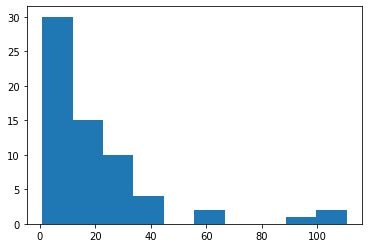

In [61]:
pl.hist(mw.err)

(array([17.,  9.,  3.,  5.,  1.,  5.,  2.,  3.,  4.,  6.]),
 array([  0.    ,  14.7835,  29.567 ,  44.3505,  59.134 ,  73.9175,
         88.701 , 103.4845, 118.268 , 133.0515, 147.835 ]),
 <a list of 10 Patch objects>)

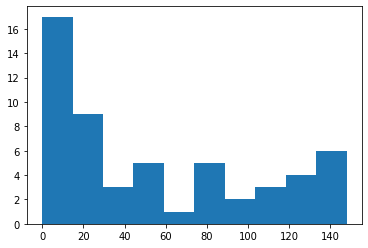

In [62]:
pl.hist(m31.dv)

(array([21., 13.,  8.,  5.,  5.,  3.,  5.,  1.,  0.,  3.]),
 array([  3.37  ,  19.5426,  35.7152,  51.8878,  68.0604,  84.233 ,
        100.4056, 116.5782, 132.7508, 148.9234, 165.096 ]),
 <a list of 10 Patch objects>)

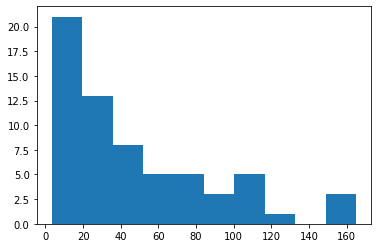

In [63]:
pl.hist(mw.dv)